# CNN for Handwritten Digit Recognition

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import datetime
import platform


In [3]:
import os
for dirname, _, filenames in os.walk('C:/Users/lamto/Desktop/digit/data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Users/lamto/Desktop/digit/data\sample_submission.csv
C:/Users/lamto/Desktop/digit/data\test.csv
C:/Users/lamto/Desktop/digit/data\train.csv


In [4]:
print('Python version:', platform.python_version())
print('Tensorflow version:', tf.__version__)
print('Keras version:', tf.keras.__version__)

Python version: 3.11.4
Tensorflow version: 2.19.0
Keras version: 3.10.0


In [5]:
# Load the TensorBoard notebook extension.
# %reload_ext tensorboard
%load_ext tensorboard

In [6]:
# Clear any logs from previous runs.
!rm -rf ./.logs/

'rm' is not recognized as an internal or external command,
operable program or batch file.


In [7]:
df_train_data = pd.read_csv("C:/Users/lamto/Desktop/digit/data/train.csv")
df_test_data = pd.read_csv("C:/Users/lamto/Desktop/digit/data/test.csv")

# Data

In [8]:
df_train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df_train_data.info(), df_train_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


(None, (42000, 785))

In [10]:
df_test_data.info(), df_test_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


(None, (28000, 784))

In [11]:
X = df_train_data.iloc[:, 1:785]
y = df_train_data.iloc[:, 0]

X_test = df_test_data.iloc[:, 0:784]

# using TSNE 

In [12]:
X_tsn = X/255

from sklearn.manifold import TSNE
tsne = TSNE()

tsne_res = tsne.fit_transform(X_tsn)

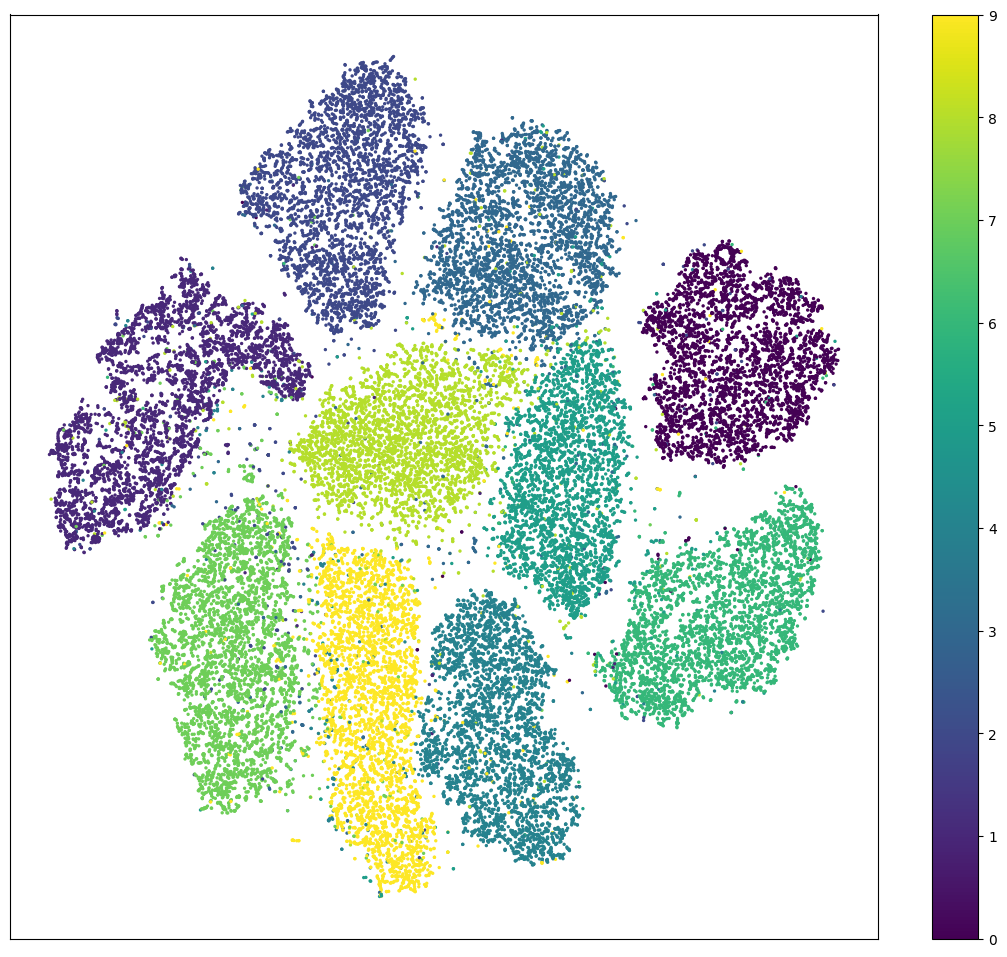

In [13]:
plt.figure(figsize=(14, 12))
plt.scatter(tsne_res[:,0], tsne_res[:,1], c=y, s=2)
plt.xticks([])
plt.yticks([])
plt.colorbar();

# Dividing our dataset (X) into two parts.
Training dataset (80%)
Validation dataset (20%)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size = 0.2,random_state = 1212)

In [15]:
# Dimension of training and validation data
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_validation:', X_validation.shape)
print('y_validation:', y_validation.shape)

X_train: (33600, 784)
y_train: (33600,)
X_validation: (8400, 784)
y_validation: (8400,)


In [16]:
#Converting training, testing, and validation data into array
x_train_re = X_train.to_numpy().reshape(33600, 28, 28)
y_train_re = y_train.values
x_validation_re = X_validation.to_numpy().reshape(8400, 28, 28)
y_validation_re = y_validation.values
x_test_re = df_test_data.to_numpy().reshape(28000, 28, 28)

In [17]:
# Dimension of training, testing, and validation data after reshaping
print('x_train:', x_train_re.shape)
print('y_train:', y_train_re.shape)
print('x_validation:', x_validation_re.shape)
print('y_validation:', y_validation_re.shape)
print('x_test:', x_test_re.shape)

x_train: (33600, 28, 28)
y_train: (33600,)
x_validation: (8400, 28, 28)
y_validation: (8400,)
x_test: (28000, 28, 28)


In [18]:
# Save image parameters to the constants that we will use later for data re-shaping and for model traning.
(_, IMAGE_WIDTH, IMAGE_HEIGHT) = x_train_re.shape
IMAGE_CHANNELS = 1

print('IMAGE_WIDTH:', IMAGE_WIDTH);
print('IMAGE_HEIGHT:', IMAGE_HEIGHT);
print('IMAGE_CHANNELS:', IMAGE_CHANNELS);

IMAGE_WIDTH: 28
IMAGE_HEIGHT: 28
IMAGE_CHANNELS: 1


In [19]:
pd.DataFrame(x_train_re[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,155,155,12,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,254,254,103,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,254,254,55,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,254,254,20,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,254,170,6,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,242,37,0,0,0,0,0,0,0,0


# Visualise how the digits were written 


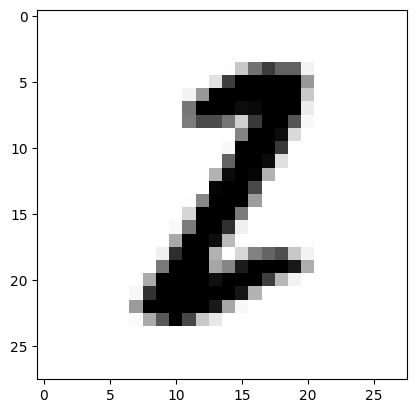

In [20]:
plt.imshow(x_train_re[0], cmap=plt.cm.binary)
plt.show()

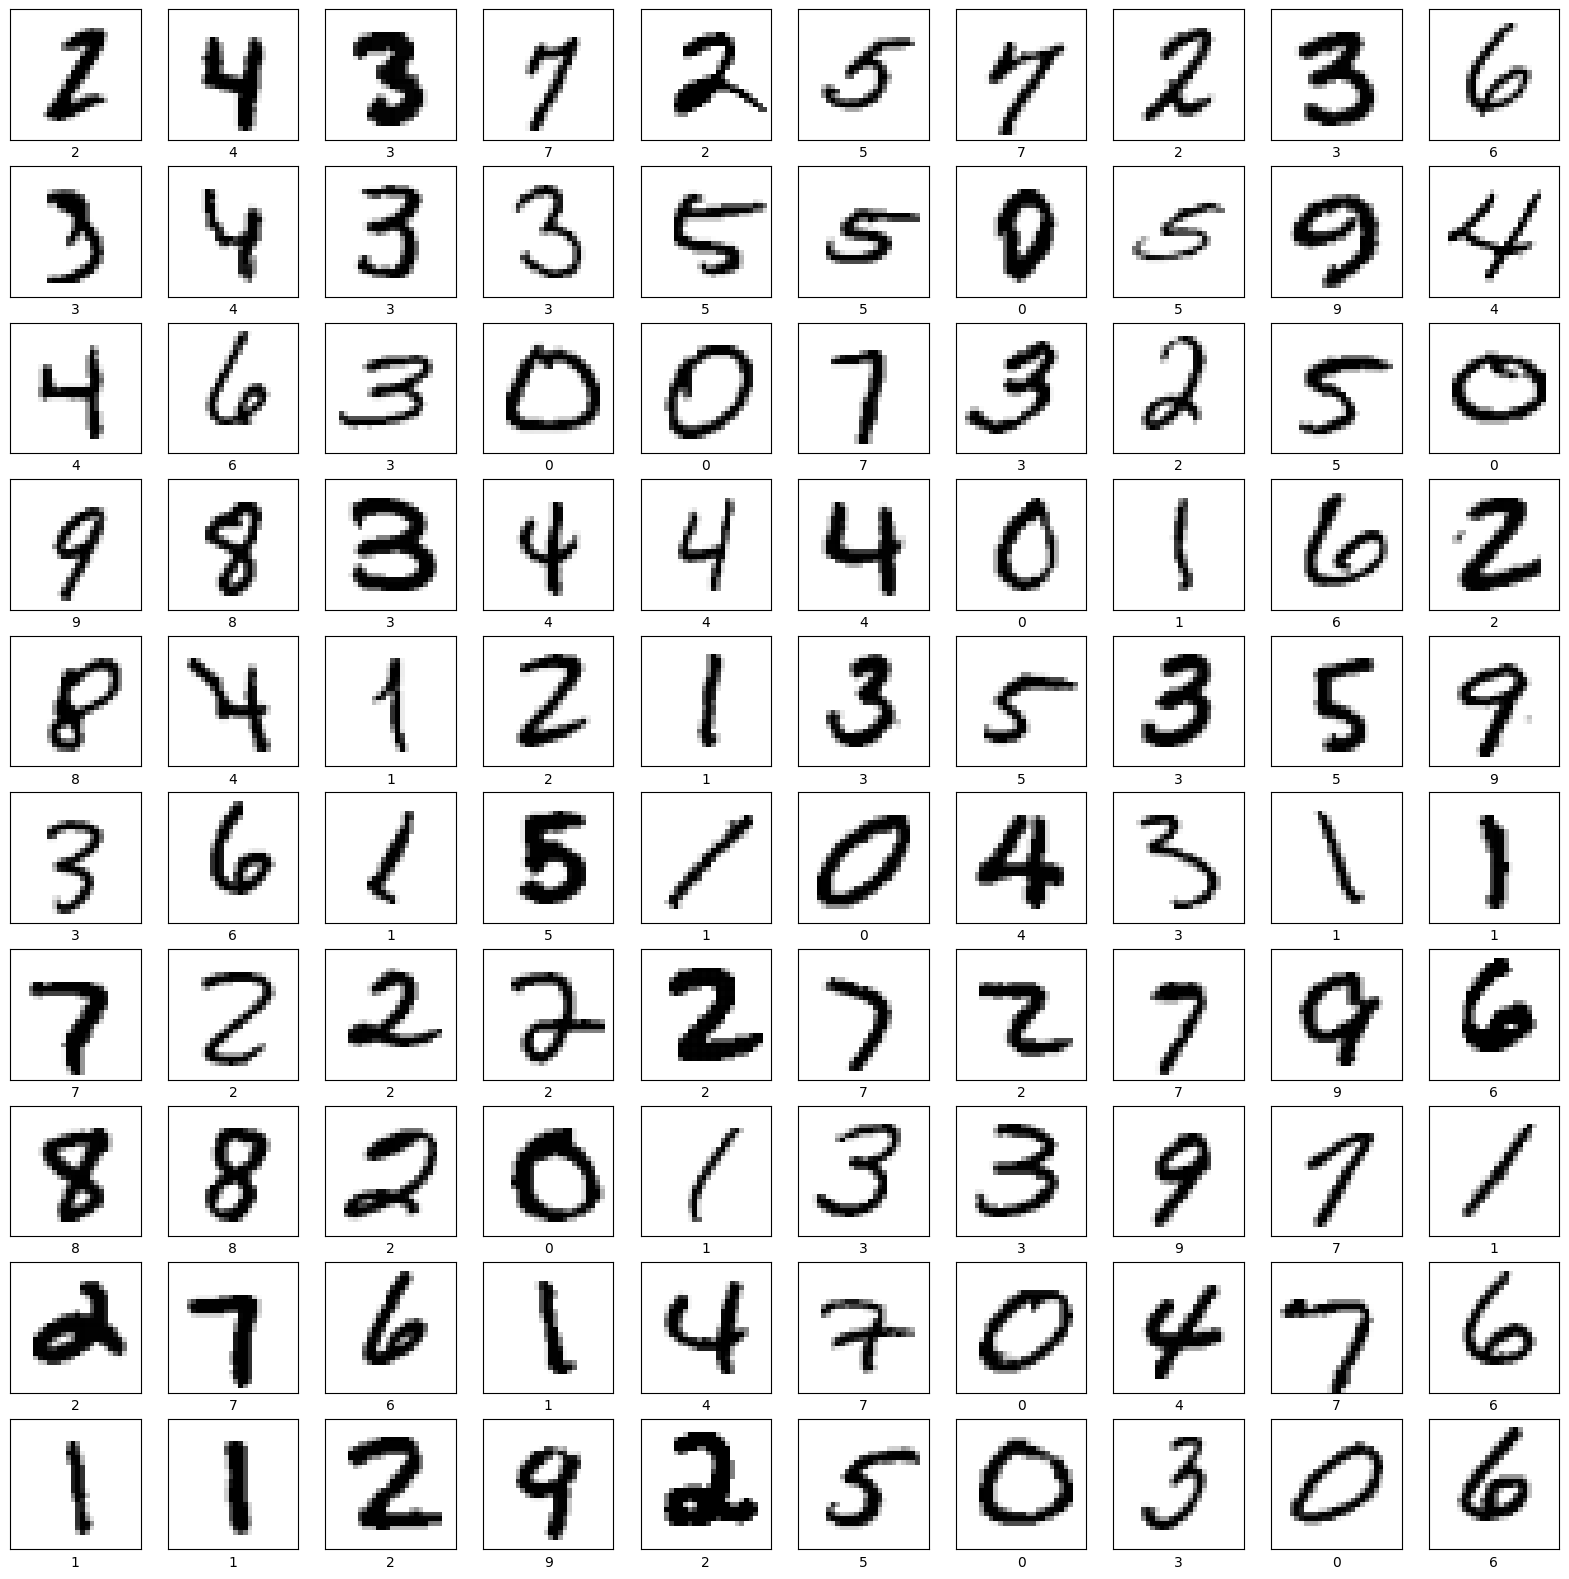

In [21]:
numbers_to_display = 100
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(20,20))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train_re[i], cmap=plt.cm.binary)
    plt.xlabel(y_train_re[i])
plt.show()

In [22]:
# Reshaping train, test, and validation data
x_train_with_chanels = x_train_re.reshape(
    x_train_re.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

x_validation_with_chanels = x_validation_re.reshape(
    x_validation_re.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

x_test_with_chanels = x_test_re.reshape(
    x_test_re.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

In [23]:
print('x_train_with_chanels:', x_train_with_chanels.shape)
print('x_validation_with_chanels:', x_validation_with_chanels.shape)
print('x_test_with_chanels:', x_test_with_chanels.shape)

x_train_with_chanels: (33600, 28, 28, 1)
x_validation_with_chanels: (8400, 28, 28, 1)
x_test_with_chanels: (28000, 28, 28, 1)


In [24]:
# Normalize train, test, and validation data
x_train_normalized = x_train_with_chanels / 255
x_validation_normalized = x_validation_with_chanels / 255
x_test_normalized = x_test_with_chanels / 255

In [25]:
x_train_normalized[0][10]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.02352941],
       [0.99607843],
       [0.99607843],
       [0.99607843],
       [0.76862745],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]])

In [26]:
# build CNN model
# Một mô hình Mạng Nơ-ron Tích Chập (Convolutional Neural Network – CNN) thường bao gồm các lớp tích chập (convolutional) và lấy mẫu gộp (pooling).

# Chúng ta đang sử dụng mô hình Sequential của Keras, trong đó có hai cặp lớp Convolution2D và MaxPooling2D.
# Lớp MaxPooling hoạt động như một hình thức giảm kích thước (downsampling), bằng cách lấy giá trị lớn nhất trong một vùng thay vì trung bình các giá trị.

# Sau đó, chúng ta sử dụng lớp Flatten để chuyển đổi dữ liệu nhiều chiều thành một vector một chiều.

# Lớp cuối cùng sẽ là một lớp Dense (mạng nơ-ron đầy đủ kết nối) với 10 đầu ra sử dụng hàm Softmax.
# Đầu ra này đại diện cho dự đoán của mạng:

# Đầu ra thứ 0 là xác suất ảnh đầu vào là chữ số 0,

# Đầu ra thứ 1 là xác suất là chữ số 1,

# … và tiếp tục cho đến

# Đầu ra thứ 9 là xác suất ảnh đầu vào là chữ số 9.

# Tóm lại, mô hình học để phân loại ảnh thành 10 chữ số (0 đến 9) dựa trên các đặc trưng trích xuất được từ ảnh.
import tensorflow as tf

# Xây dựng mô hình CNN
model = tf.keras.models.Sequential()

# Lớp đầu vào
model.add(tf.keras.layers.Input(shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))

# Lớp tích chập 1
model.add(tf.keras.layers.Conv2D(
    kernel_size=5,
    filters=8,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

# Lớp max pooling 1
model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

# Lớp tích chập 2
model.add(tf.keras.layers.Conv2D(
    kernel_size=5,
    filters=16,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

# Lớp max pooling 2
model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

# Chuyển sang vector 1 chiều
model.add(tf.keras.layers.Flatten())

# Lớp fully connected ẩn
model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu
))

# Dropout để giảm overfitting
model.add(tf.keras.layers.Dropout(0.2))

# Lớp đầu ra
model.add(tf.keras.layers.Dense(
    units=10,
    activation=tf.keras.activations.softmax,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))


In [27]:
# Summary of the training model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 8)      │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 8, 8, 16)       │         3,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,610 (146.91 KB)

 Trainable params: 37,610 (146.91 KB)

 Non-trainable params: 0 (0.00 B)

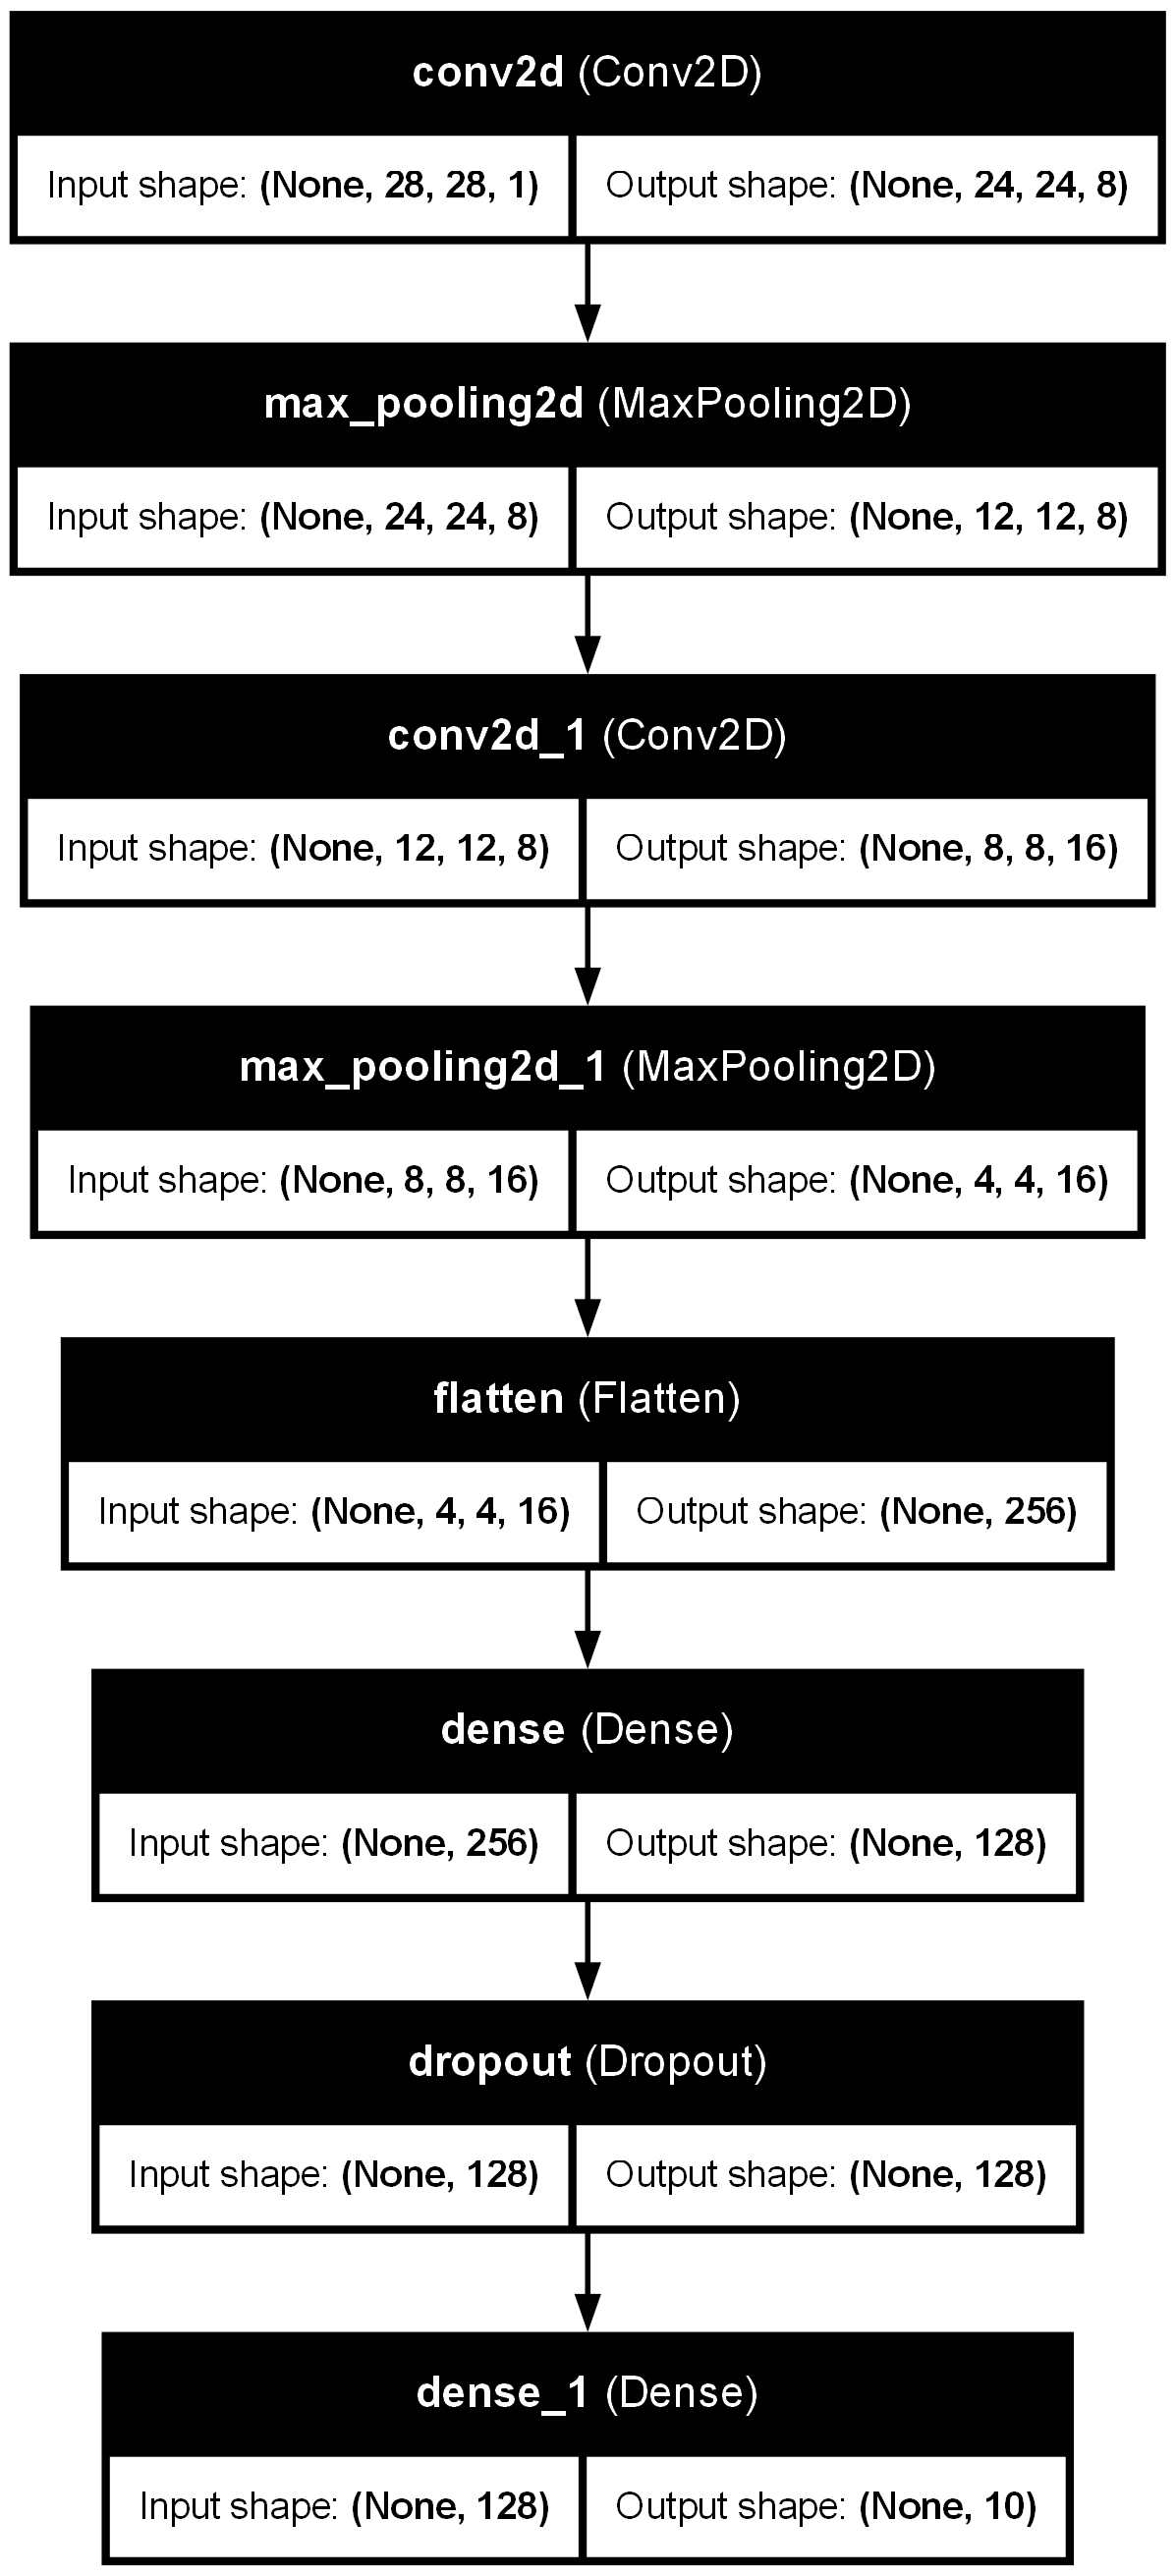

In [28]:
# Visualization of the model
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

In [29]:
# Compile the model using keras.optimizers.Adam
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

# train model

In [30]:
log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

training_history = model.fit(
    x_train_normalized,
    y_train_re,
    epochs=10,
    validation_data=(x_validation_normalized, y_validation_re),
    callbacks=[tensorboard_callback]
)

print("The model has successfully trained")

Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8102 - loss: 0.6082 - val_accuracy: 0.9743 - val_loss: 0.0822
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9714 - loss: 0.0929 - val_accuracy: 0.9773 - val_loss: 0.0736
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9798 - loss: 0.0666 - val_accuracy: 0.9849 - val_loss: 0.0492
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9862 - loss: 0.0452 - val_accuracy: 0.9870 - val_loss: 0.0441
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9889 - loss: 0.0365 - val_accuracy: 0.9882 - val_loss: 0.0415
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9902 - loss: 0.0305 - val_accuracy: 0.9873 - val_loss: 0.0462
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9915 - loss: 0.0264 - val_accuracy: 0.9879 - val_loss: 0.0430
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9921 - loss: 0.0226 - 

# Model evaluation

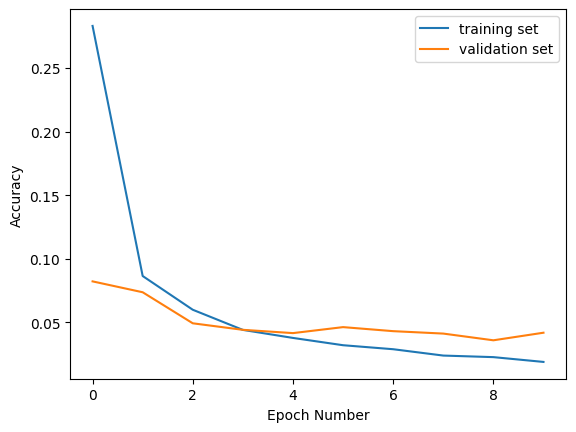

In [31]:
# show loss
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='validation set')
plt.legend()

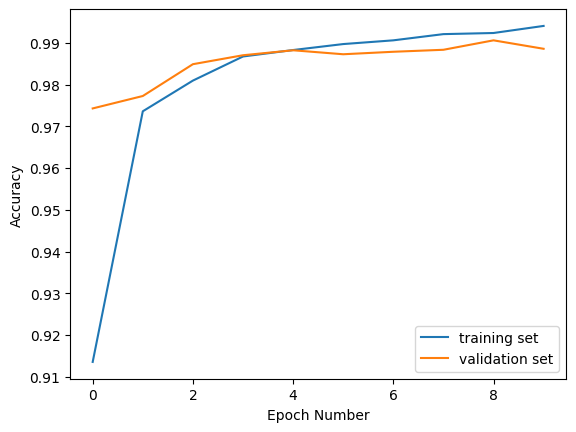

In [32]:
# Accuracy
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='validation set')
plt.legend()

# Evaluation of the model accuracy

In [33]:
%%capture
train_loss, train_accuracy = model.evaluate(x_train_normalized, y_train_re)

In [34]:
print('Train loss: ', train_loss)
print('Train accuracy: ', train_accuracy)

Train loss:  0.00906960666179657
Train accuracy:  0.9971725940704346


In [37]:
%%capture
validation_loss, validation_accuracy = model.evaluate(x_validation_normalized, y_validation_re)

In [38]:
print('Validation loss: ', validation_loss)
print('Validation accuracy: ', validation_accuracy)

Validation loss:  0.04181162267923355
Validation accuracy:  0.9885714054107666


In [41]:
# Save and load the model
model_name = 'digits_recognition_cnn.keras'
model.save(model_name)

In [43]:
loaded_model = tf.keras.models.load_model(model_name, compile=False)

In [46]:
# Visualise validation predicted data on how the digits were written
predictions_one_hot = loaded_model.predict(x_validation_normalized)

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [45]:
print('predictions_one_hot:', predictions_one_hot.shape)

predictions_one_hot: (8400, 10)


In [47]:
# Predictions in form of one-hot vectors (arrays of probabilities).
pd.DataFrame(predictions_one_hot)

,0,1,2,3,4,5,6,7,8,9
0,3.483114e-08,9.999963e-01,4.884242e-07,1.007994e-13,5.138195e-07,4.763036e-10,8.864165e-07,9.054408e-10,1.809169e-06,5.973026e-09
1,7.666941e-13,1.546606e-09,1.202228e-09,1.000000e+00,1.141273e-12,7.054771e-09,1.129140e-15,1.693270e-10,1.020849e-10,2.810904e-08
2,4.004246e-12,1.035340e-12,2.937664e-09,1.887784e-07,2.082408e-14,4.573627e-09,8.168583e-12,3.019564e-14,9.999998e-01,2.048438e-10
3,2.396733e-08,9.999920e-01,2.766504e-06,1.427419e-10,2.378488e-06,1.287711e-08,4.208812e-07,1.753645e-06,3.161368e-07,2.281891e-07
4,1.014877e-11,2.540481e-14,6.452053e-10,1.658173e-08,6.988039e-06,8.538697e-11,1.014569e-16,2.073196e-07,5.515245e-06,9.999872e-01
...,...,...,...,...,...,...,...,...,...,...
8395,2.817479e-16,1.655496e-15,4.977533e-12,8.867755e-17,1.000000e+00,9.398958e-11,6.218965e-13,3.229752e-15,5.017409e-14,3.961592e-08
8396,1.747053e-09,6.817413e-16,3.010038e-15,7.742190e-09,9.270439e-15,9.999667e-01,3.304510e-05,5.184493e-17,1.596197e-07,5.146964e-13
8397,2.985583e-09,1.592621e-09,6.974029e-10,1.107441e-09,9.024052e-07,1.472535e-09,3.240573e-13,9.999982e-01,2.777541e-09,8.458140e-07
8398,6.730613e-08,9.009624e-10,6.219364e-12,1.988827e-11,5.250373e-08,1.324668e-03,9.986722e-01,1.760593e-13,2.982650e-06,6.684862e-12


In [48]:
# Extract predictions with highest probabilites
predictions = np.argmax(predictions_one_hot, axis=1)
pd.DataFrame(predictions)

,0
0,1
1,3
2,8
3,1
4,9
...,...
8395,4
8396,5
8397,7
8398,6


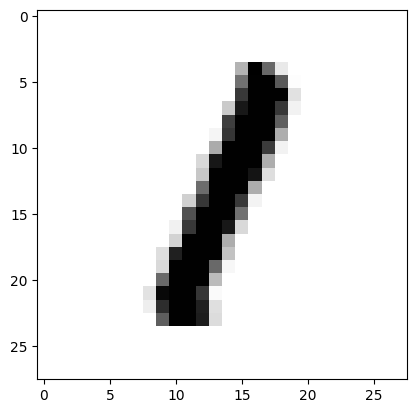

In [49]:
plt.imshow(x_validation_normalized[0].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=plt.cm.binary)
plt.show()

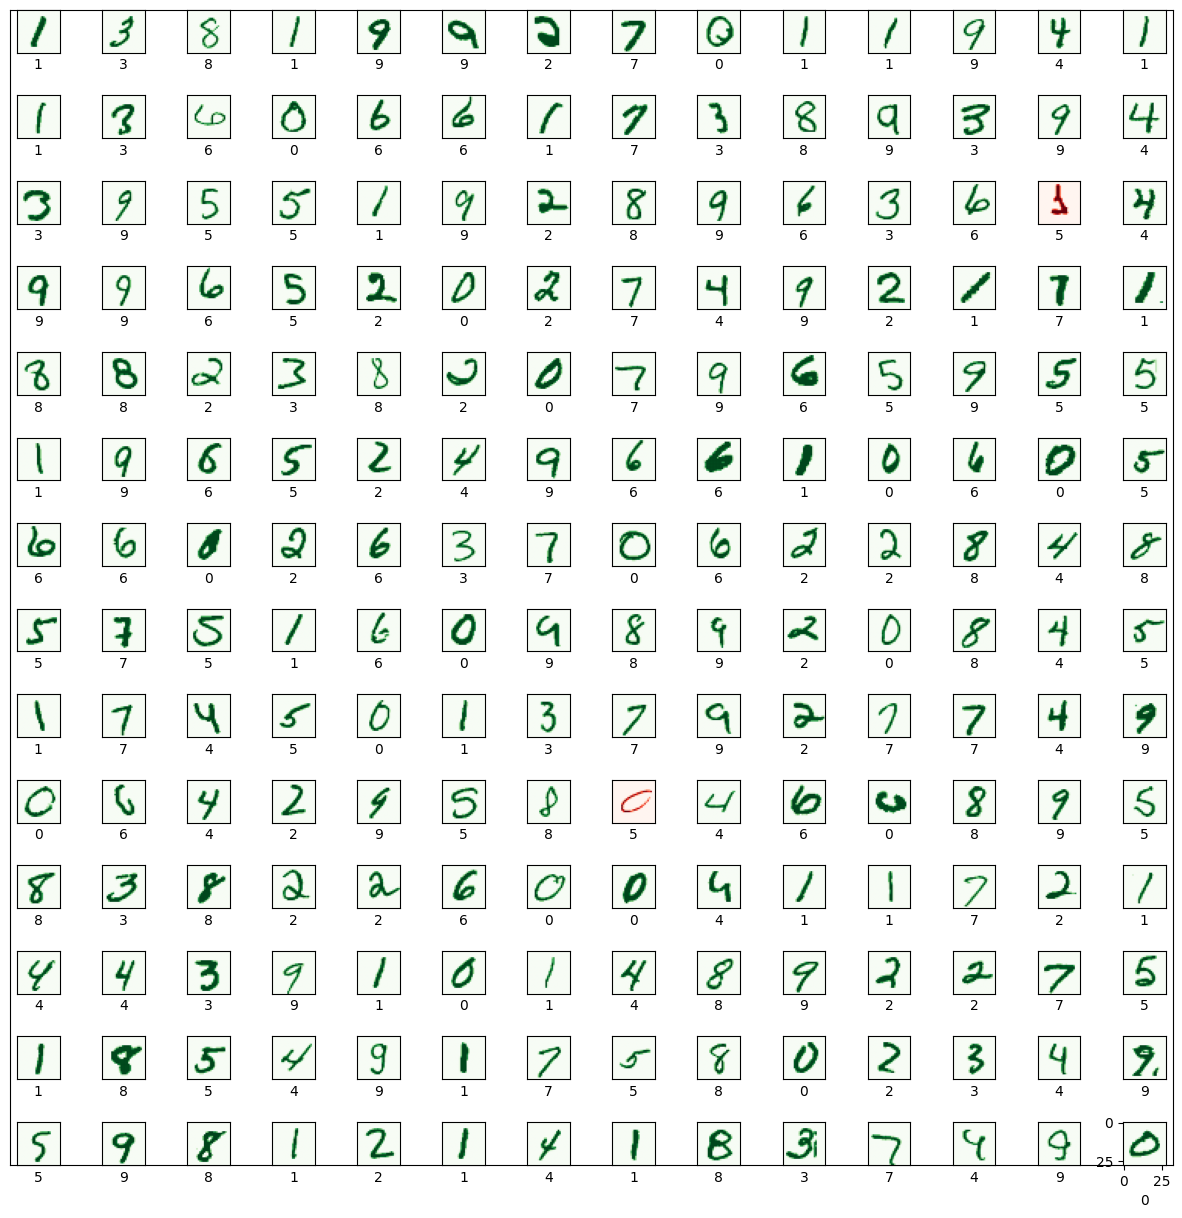

In [50]:
numbers_to_display = 196
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))

for plot_index in range(numbers_to_display):    
    predicted_label = predictions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label == y_validation_re[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_validation_normalized[plot_index].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=color_map)
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()

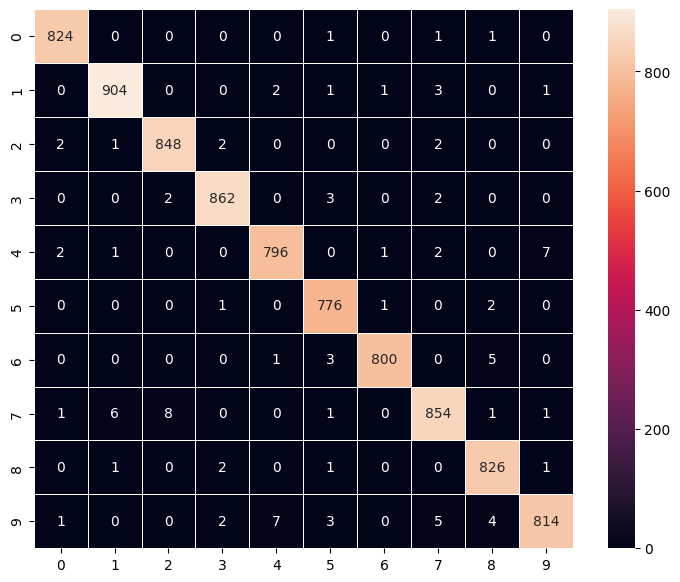

In [51]:
# Confusion matrix of validation dataset
confusion_matrix = tf.math.confusion_matrix(y_validation_re, predictions)
f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.5,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

# Model prediction on unseen dataset (test data)

In [52]:
predictions_one_hot = loaded_model.predict([x_test_normalized])
print('predictions_one_hot:', predictions_one_hot.shape)

875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
predictions_one_hot: (28000, 10)


In [ ]:
pd.DataFrame(predictions_one_hot)

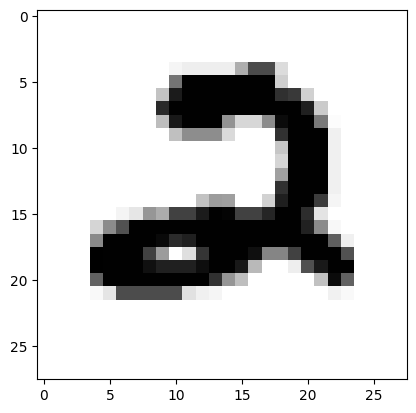

In [53]:
plt.imshow(x_test_normalized[0].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=plt.cm.binary)
plt.show()

In [54]:
test_pred = pd.DataFrame( loaded_model.predict([x_test_normalized]))
test_pred = pd.DataFrame(test_pred.idxmax(axis = 1))
test_pred.index.name = 'ImageId'
test_pred = test_pred.rename(columns = {0: 'Label'}).reset_index()
test_pred['ImageId'] = test_pred['ImageId'] + 1

test_pred.head()

875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


In [55]:
test_pred.to_csv('submission.csv', index = False)